__Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data 
and identify the number of clusters formed and draw inferences.__


# Hierarchical Clustering

In [58]:
# import libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_crime = pd.read_csv("crime_data.csv")
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [3]:
df_crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df_crime2 = df_crime.iloc[:, 1:]
df_crime2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [47]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_crime_norm = df_crime2.copy()

for (columnName, columnData) in df_crime2.iteritems():
    scaler.fit(df_norm[[columnName]])
    df_crime_norm[columnName] = scaler.transform(df_crime_norm[[columnName]])
 
df_crime_norm

,Murder,Assault,UrbanPop,Rape
0,13.2,236.0,58.0,21.2
1,10.0,263.0,48.0,44.5
2,8.1,294.0,80.0,31.0
3,8.8,190.0,50.0,19.5
4,9.0,276.0,91.0,40.6
5,7.9,204.0,78.0,38.7
6,3.3,110.0,77.0,11.1
7,5.9,238.0,72.0,15.8
8,15.4,335.0,80.0,31.9
9,17.4,211.0,60.0,25.8


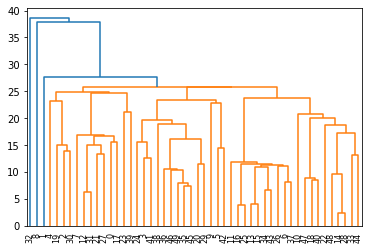

In [26]:
dendrogram = sch.dendrogram(sch.linkage(df_crime_norm, method='single'))

In [48]:
# create clusters

cluster_hie = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

y_hc = cluster_hie.fit_predict(df_crime_norm)
Clust = pd.DataFrame(y_hc, columns=['Clusters'])

df_crime_hie = df_crime.copy()
df_crime_hie['clusterid'] = Clust.Clusters

count = df_crime_hie.groupby(['clusterid']).size()
df_crime_hie2 = df_crime_hie.groupby('clusterid').agg(['mean'])
df_crime_hie2['count'] = count

df_crime_hie2

,Murder,Assault,UrbanPop,Rape,count
,mean,mean,mean,mean,
clusterid,,,,,
0,5.894118,122.852941,64.235294,17.870588,34
1,11.584615,263.538462,70.769231,27.807692,13
2,15.400000,335.000000,80.000000,31.900000,1
3,10.000000,263.000000,48.000000,44.500000,1
4,13.000000,337.000000,45.000000,16.100000,1


__Number of clusters considered are 5, from 'Elbow' chart 5-7 looks optimal number of clusters.__

__Cluster 1 has maximum records 34 from 13, highest Assault mean among murder and rape crime, minimum murder crime.
other than cluster 1, cluster 0 has 2 records and all other has only one records, so hirarchical clustering suggest that 
only few records are different.__
__cluster 4 with only one record/state has highest assault crime, mimimum urban population and minimum rape crime__


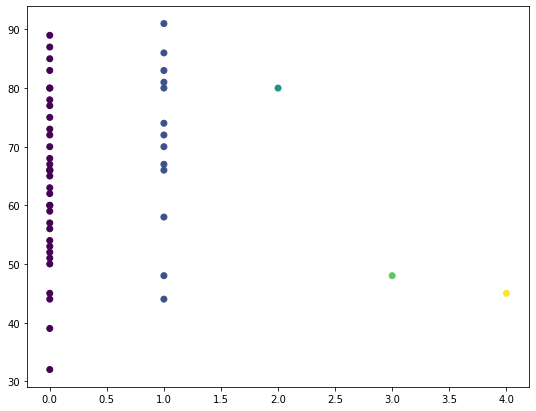

In [50]:
plt.figure(figsize=(9, 7))  
plt.scatter(df_crime_hie['clusterid'], df_crime_hie['UrbanPop'], c=cluster_hie.labels_)

# K-Means Clustering

In [28]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


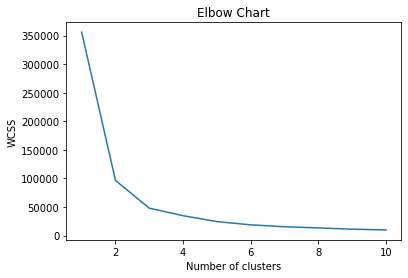

In [29]:
#finding optimum number of cluster, from Elbow chart

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_crime_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Chart')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
clusters_km = KMeans(4, random_state=42)
clusters_km.fit(df_crime_norm)

KMeans(n_clusters=4, random_state=42)

In [34]:
clusters_km.labels_

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0])

In [35]:
df_crime_km = df_crime.copy()
df_crime_km['clusterid_km'] = clusters_km.labels_

count = df_crime_km.groupby(['clusterid_km']).size()
df_crime_km2 = df_crime_km.groupby('clusterid_km').agg(['mean']).reset_index()
df_crime_km2['count'] = count

df_crime_km2


,clusterid_km,Murder,Assault,UrbanPop,Rape,count
,,mean,mean,mean,mean,
0,0,8.214286,173.285714,70.642857,22.842857,14
1,1,5.590000,112.400000,65.600000,17.270000,10
2,2,11.812500,272.562500,68.312500,28.375000,16
3,3,2.950000,62.700000,53.900000,11.510000,10


__From 'Elbow' chart optimal number of clusters identified is 4__

__Cluster 0 and 2 has higest number of records respectively, 
Cluster 3 has 10 records with all crimes and urban population minimum among all other clusters__ 

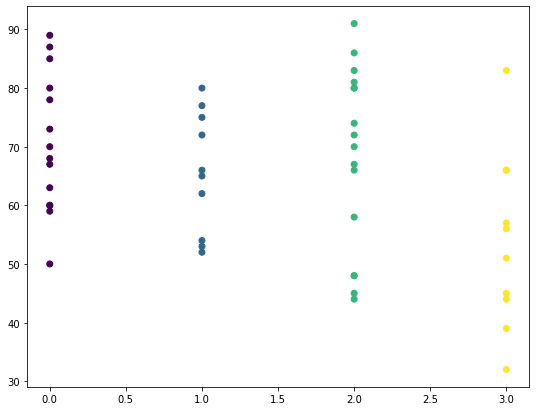

In [52]:
plt.figure(figsize=(9, 7))  
plt.scatter(df_crime_km['clusterid_km'], df_crime_km['UrbanPop'], c=clusters_km.labels_)

# DBSCAN Clustering

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [37]:
array_crime = df_crime.iloc[:,1:].values
stscaler = StandardScaler().fit(array_crime)
X = stscaler.transform(array_crime)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [44]:
dbscan_crime = DBSCAN(eps=1, min_samples=4)
dbscan_crime.fit(X)

DBSCAN(eps=1, min_samples=4)

In [45]:
df_crime_dbsc = df_crime.copy()
df_crime_dbsc['clusterid_dbsc'] = dbscan_crime.labels_

In [66]:
count = df_crime_dbsc.groupby(['clusterid_dbsc']).size()
col = pd.DataFrame(count, columns=['count'])
df_crime_dbsc2 = df_crime_dbsc.groupby('clusterid_dbsc').agg(['mean'])

df_crime_dbsc2 = pd.concat([df_crime_dbsc2, col], axis=1)
df_crime_dbsc2

,"(Murder, mean)","(Assault, mean)","(UrbanPop, mean)","(Rape, mean)",count
clusterid_dbsc,,,,,
-1,11.005556,247.166667,70.666667,28.766667,18
0,14.050000,238.000000,57.750000,23.200000,4
1,4.825000,112.035714,63.357143,16.107143,28


__From 'Elbow' chart and after try and tested eps and MinPts, we get numer of clusters 2 and one outlier/noise cluster.
outlier cluster -1 has 18 records which is 36% of total records, and cluster 1 has more than 50% of records.__

__Cluster 1 has maximum records ie 28, has lowest murder crime, assault crime and rape crime, second lowest urban population__

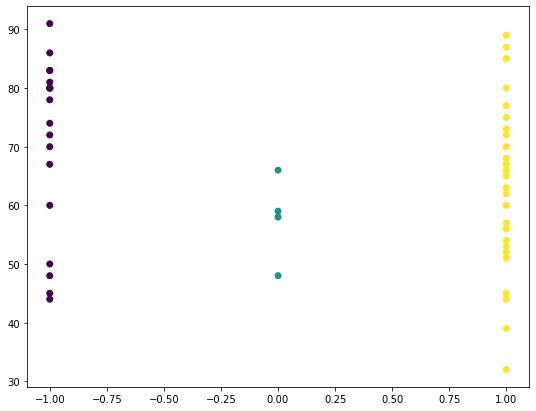

In [70]:
plt.figure(figsize=(9, 7))
plt.scatter(df_crime_dbsc['clusterid_dbsc'], df_crime_dbsc['UrbanPop'], c=dbscan_crime.labels_)